# Using Stochastic Gradient Descent On Linear Regression To Predict The Best Time To Go To The Gym

## 1. Introduction

We will use the "Crowdedness at the Campus Gym" dataset and the stochastic gradient descent linear regression (SGDRegressor) algorithm from the scikit-learn library to build and train a model for predicting the best time to go to the gym and avoid crowds.

The dataset contains 11 columns with the following information.

* `number_people`: this is the number of people at the gym at each observation. This will be our target variable or label.
* `date`: a string value with the specific date and time information.
* `timestamp`: an integer (int), with the number of seconds since the start of the day (00:00).
* `day_of_week`: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
* `is_weekend`: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
* `is_holiday`: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
* `temperature`: a float, defining the temperature during the day of the observation in Fahrenheit.
* `is_start_of_semester`: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
* `is_during_semester`: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
* `month`: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
* `hour`: an integer (int) for the hour of the day from 0 to 23.

## 2. Import the Libraries and Load the Data

In [1]:
# Load the relevant libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the data into a dataframe
gym_data = pd.read_csv('crowdness_gym_data.csv', parse_dates=['date'])

# Let's take a look at the first 5 rows of the dataframe
gym_data.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
# Inspect the number of rows and columns in the dataset
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


There are 11 columns (as noted above), and 62,184 rows, with no missing values.

In [4]:
# Double check for missing values
gym_data.isna().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

## 3. EDA and Cleaning the Data

In [5]:
# Display the descriptive statistics for the dataframe
gym_data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


Nothing particularly jumps out in the figures above.

Let's now draw some plots to get more insights into the data. We'll begin with visualizations for univariate analysis.

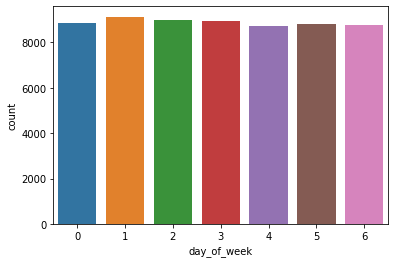

In [6]:
ax = sns.countplot(x="day_of_week", data=gym_data)

From the plot above, the count for each day of the week looks fairly even. Tuesday's count is the highest, but not by much.

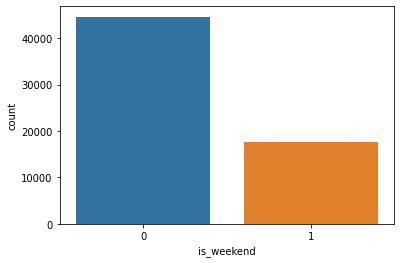

In [7]:
ax = sns.countplot(x="is_weekend", data=gym_data)

Unsurprisingly, more observations are for non-weekend days than for weekend days. The distribution looks to mirror the ratio of non-weekend days to weekend days. (Nothing stands out here.)

In [8]:
gym_data['is_weekend'].value_counts(normalize=True)

0    0.71713
1    0.28287
Name: is_weekend, dtype: float64

These figures confirm that the `is_weekend` data merely reflects the ratio of non-weekend days to weekend days.

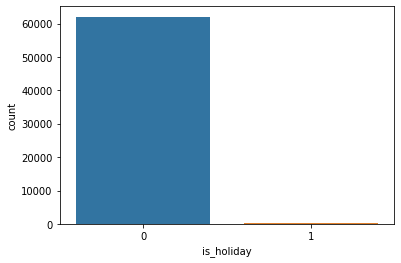

In [9]:
ax = sns.countplot(x="is_holiday", data=gym_data)

Clearly (and unsurprisingly) the majority of observations are not during a holiday.